## K Means Clustering

#### pros

1. They work well when clusters have a spherical shape.
2. They’re scalable with respect to algorithm complexity.


#### Cons
1. They’re not well suited for clusters with complex shapes and different sizes.
2. They break down when used with clusters of different densities.

In [66]:
# Creating a Dataset for clustering
from sklearn.datasets import make_blobs

features, true_labels = make_blobs(
n_samples=200,
centers=3,
cluster_std=2.75,
random_state=42
)

In [67]:
#Standardizing the features

from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
features = scaler.fit_transform(features)

In [68]:
from sklearn.cluster import KMeans

In [69]:
# Creating K Means Model

k_means = KMeans( init = 'random' , 
      n_clusters = 3,
      max_iter =300 ,
      n_init = 10,
      random_state= 42)

In [70]:
kmeans =k_means.fit(features)

In [71]:
# The lowest SSE value
kmeans.inertia_

74.57960106819854

In [72]:
# Final centroid values
kmeans.cluster_centers_

array([[-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732],
       [ 1.19539276,  0.13158148]])

# Choosing the Appropriate Number of Clusters

#### Two methods that are commonly used to evaluate the appropriate number of clusters:

1. The elbow method
2. The silhouette coefficient

In [73]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
    }

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


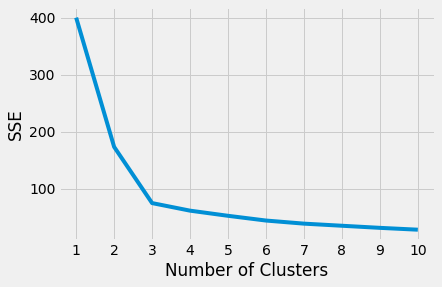

In [74]:
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()



## The silhouette coefficient is a measure of cluster cohesion and separation.

It quantifies how well a data point fits into its assigned cluster based on two factors:
1. How close the data point is to other points in the cluster
2. How far away the data point is from points in other clusters

Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.


In [75]:
from sklearn.metrics import silhouette_score

In [76]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(features)
    score = silhouette_score(features, kmeans.labels_)
    silhouette_coefficients.append(score)

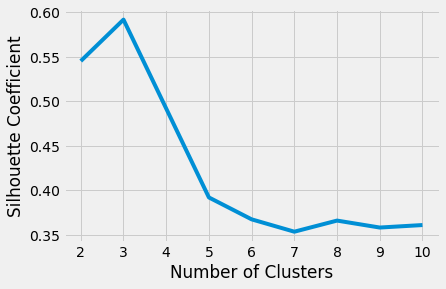

In [77]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()
